### If you ran the script `c_section.sh`

Then you should have the files
```
in_network.csv
negotiated_prices.csv
provider_groups.csv
```

Place this notebook in that folder and run it. 

In [1]:
import polars as pl
import matplotlib.pyplot as plt

In [2]:
df_code = (pl
           .read_csv('in_network.csv')
           .filter(pl.col('negotiation_arrangement') == 'ffs'))
           

df_price = (pl
            .read_csv('negotiated_prices.csv')
            .filter(pl.col('negotiated_type') == 'negotiated'))

df_provgroups = (pl
                 .read_csv('provider_groups.csv', 
                           columns =['in_network_hash_id', 'npi_numbers'])
                 .with_column(
                     pl.col('npi_numbers').apply(eval)
                 ).explode('npi_numbers'))

In [3]:
df = df_price.join(df_code, on = 'in_network_hash_id')

In [5]:
df.head()

shape: (5, 17)
┌────────────┬────────────┬────────────┬────────────┬─────┬────────────┬───────────┬────────────┬────────────┐
│ root_hash_ ┆ in_network ┆ negotiated ┆ billing_cl ┆ ... ┆ billing_co ┆ descripti ┆ billing_co ┆ billing_co │
│ id         ┆ _hash_id   ┆ _rates_has ┆ ass        ┆     ┆ de_type_ve ┆ on        ┆ de         ┆ de_type    │
│ ---        ┆ ---        ┆ h_id       ┆ ---        ┆     ┆ rsion      ┆ ---       ┆ ---        ┆ ---        │
│ str        ┆ str        ┆ ---        ┆ str        ┆     ┆ ---        ┆ str       ┆ i64        ┆ str        │
│            ┆            ┆ str        ┆            ┆     ┆ i64        ┆           ┆            ┆            │
╞════════════╪════════════╪════════════╪════════════╪═════╪════════════╪═══════════╪════════════╪════════════╡
│ d245975576 ┆ 54a89e1fa8 ┆ 4b99006f73 ┆ profession ┆ ... ┆ 2022       ┆ Routine   ┆ 59510      ┆ CPT        │
│ 7c772835e1 ┆ 570e44c4fc ┆ 33e18198bf ┆ al         ┆     ┆            ┆ obstetric ┆            ┆            │
│ 8a8c49e225 ┆ b482f7f0af ┆ d3d2f9b1a0 ┆            ┆     ┆            ┆ care incl ┆            ┆            │
│ ae         ┆ b8         ┆ 80         ┆            ┆     ┆            ┆ uding...  ┆            ┆            │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ d245975576 ┆ 54a89e1fa8 ┆ db2ed12d91 ┆ profession ┆ ... ┆ 2022       ┆ Routine   ┆ 59510      ┆ CPT        │
│ 7c772835e1 ┆ 570e44c4fc ┆ 1f0fb0ea36 ┆ al         ┆     ┆            ┆ obstetric ┆            ┆            │
│ 8a8c49e225 ┆ b482f7f0af ┆ 5e8b8b2137 ┆            ┆     ┆            ┆ care incl ┆            ┆            │
│ ae         ┆ b8         ┆ 01         ┆            ┆     ┆            ┆ uding...  ┆            ┆            │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ d245975576 ┆ 54a89e1fa8 ┆ 74b14bcda7 ┆ profession ┆ ... ┆ 2022       ┆ Routine   ┆ 59510      ┆ CPT        │
│ 7c772835e1 ┆ 570e44c4fc ┆ 80261c9b4e ┆ al         ┆     ┆            ┆ obstetric ┆            ┆            │
│ 8a8c49e225 ┆ b482f7f0af ┆ a4dea23e79 ┆            ┆     ┆            ┆ care incl ┆            ┆            │
│ ae         ┆ b8         ┆ cc         ┆            ┆     ┆            ┆ uding...  ┆            ┆            │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ d245975576 ┆ 54a89e1fa8 ┆ 7bc7fa48a2 ┆ profession ┆ ... ┆ 2022       ┆ Routine   ┆ 59510      ┆ CPT        │
│ 7c772835e1 ┆ 570e44c4fc ┆ af4cc92bd5 ┆ al         ┆     ┆            ┆ obstetric ┆            ┆            │
│ 8a8c49e225 ┆ b482f7f0af ┆ 9b73bfaa8b ┆            ┆     ┆            ┆ care incl ┆            ┆            │
│ ae         ┆ b8         ┆ 38         ┆            ┆     ┆            ┆ uding...  ┆            ┆            │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ d245975576 ┆ 54a89e1fa8 ┆ 50b5af5322 ┆ profession ┆ ... ┆ 2022       ┆ Routine   ┆ 59510      ┆ CPT        │
│ 7c772835e1 ┆ 570e44c4fc ┆ 603913a76c ┆ al         ┆     ┆            ┆ obstetric ┆            ┆            │
│ 8a8c49e225 ┆ b482f7f0af ┆ 48995b6c18 ┆            ┆     ┆            ┆ care incl ┆            ┆            │
│ ae         ┆ b8         ┆ 7c         ┆            ┆     ┆            ┆ uding...  ┆            ┆            │
└────────────┴────────────┴────────────┴────────────┴─────┴────────────┴───────────┴────────────┴────────────┘

In [22]:
df = df.with_column(
    pl.concat_str([pl.col('billing_code_type'), pl.lit(' '), pl.col('billing_code')]).alias('code')
)

In [23]:
source = df.pivot(index = 'negotiated_rates_hash_id', values = 'negotiated_rate', columns = ['code']).to_pandas()
source.head()

negotiated_rates_hash_id  CPT 59510  CPT 59514  CPT 59515  \
0  4b99006f7333e18198bfd3d2f9b1a080    2585.89        NaN        NaN   
1  db2ed12d911f0fb0ea365e8b8b213701    2462.75        NaN        NaN   
2  74b14bcda780261c9b4ea4dea23e79cc    2300.00        NaN        NaN   
3  7bc7fa48a2af4cc92bd59b73bfaa8b38    2537.54        NaN        NaN   
4  50b5af5322603913a76c48995b6c187c    2662.70        NaN        NaN   

   CPT 59618  CPT 59620  CPT 59622  
0        NaN        NaN        NaN  
1        NaN        NaN        NaN  
2     2300.0        NaN        NaN  
3        NaN        NaN        NaN  
4        NaN        NaN        NaN

In [41]:
import altair as alt
alt.data_transformers.disable_max_rows()

# source: https://altair-viz.github.io/gallery/layered_histogram.html
# billing codes source: https://www.bcbsok.com/pdf/obstetrical_billing_multiple_birth.pdf

alt.Chart(source).transform_fold(
    list(source.columns[1:]),
    as_=['Billing Code', 'Negotiated Price']
).mark_bar(
    opacity=0.5,
    binSpacing=0
).encode(
    alt.X("Negotiated Price:Q", bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None, scale=alt.Scale(type="log")),
    alt.Color('Billing Code:N')
).properties(
    title = 'Negotiated Rates for C-sections (sample from United HealthCare)'
)

alt.Chart(...)

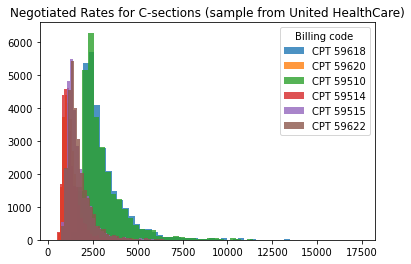

In [37]:
codes = df['code'].unique()

for code in codes:
    q = (df
         .filter(pl.col('code') == code)
         .to_pandas())
    if len(q) > 0:
        plt.hist(q['negotiated_rate'], label = code, bins = 50, alpha = 0.8)
        
plt.legend(title = 'Billing code')
plt.title("Negotiated Rates for C-sections (sample from United HealthCare)")
plt.savefig('c_sections_mpl.png', dpi=300)

In [38]:
df_high = (df
           .filter(pl.col('negotiated_rate') > 10_000)
           .join(df_provgroups, on = 'in_network_hash_id', how = 'inner')
           .unique())

In [39]:
df_high.tail()

shape: (6452460, 19)
┌────────────┬────────────┬────────────┬────────────┬─────┬────────────┬────────────┬─────┬───────────┐
│ root_hash_ ┆ in_network ┆ negotiated ┆ billing_cl ┆ ... ┆ billing_co ┆ billing_co ┆ cod ┆ npi_numbe │
│ id         ┆ _hash_id   ┆ _rates_has ┆ ass        ┆     ┆ de         ┆ de_type    ┆ e   ┆ rs        │
│ ---        ┆ ---        ┆ h_id       ┆ ---        ┆     ┆ ---        ┆ ---        ┆ --- ┆ ---       │
│ str        ┆ str        ┆ ---        ┆ str        ┆     ┆ i64        ┆ str        ┆ str ┆ i64       │
│            ┆            ┆ str        ┆            ┆     ┆            ┆            ┆     ┆           │
╞════════════╪════════════╪════════════╪════════════╪═════╪════════════╪════════════╪═════╪═══════════╡
│ d245975576 ┆ 54a89e1fa8 ┆ 718e7af8ac ┆ profession ┆ ... ┆ 59510      ┆ CPT        ┆ CPT ┆ 191299036 │
│ 7c772835e1 ┆ 570e44c4fc ┆ 72556502ca ┆ al         ┆     ┆            ┆            ┆ 595 ┆ 7         │
│ 8a8c49e225 ┆ b482f7f0af ┆ 5967285971 ┆            ┆     ┆            ┆            ┆ 10  ┆           │
│ ae         ┆ b8         ┆ 52         ┆            ┆     ┆            ┆            ┆     ┆           │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ d245975576 ┆ 54a89e1fa8 ┆ 3674e7b469 ┆ profession ┆ ... ┆ 59510      ┆ CPT        ┆ CPT ┆ 191299036 │
│ 7c772835e1 ┆ 570e44c4fc ┆ 06e1ab0a9c ┆ al         ┆     ┆            ┆            ┆ 595 ┆ 7         │
│ 8a8c49e225 ┆ b482f7f0af ┆ f0f4987ffa ┆            ┆     ┆            ┆            ┆ 10  ┆           │
│ ae         ┆ b8         ┆ 31         ┆            ┆     ┆            ┆            ┆     ┆           │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ d245975576 ┆ 54a89e1fa8 ┆ acb5490e99 ┆ profession ┆ ... ┆ 59510      ┆ CPT        ┆ CPT ┆ 191299036 │
│ 7c772835e1 ┆ 570e44c4fc ┆ e6027b1785 ┆ al         ┆     ┆            ┆            ┆ 595 ┆ 7         │
│ 8a8c49e225 ┆ b482f7f0af ┆ be087a5589 ┆            ┆     ┆            ┆            ┆ 10  ┆           │
│ ae         ┆ b8         ┆ 5c         ┆            ┆     ┆            ┆            ┆     ┆           │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ d245975576 ┆ 54a89e1fa8 ┆ cfb22cdcec ┆ profession ┆ ... ┆ 59510      ┆ CPT        ┆ CPT ┆ 191299036 │
│ 7c772835e1 ┆ 570e44c4fc ┆ 5d3228bf8c ┆ al         ┆     ┆            ┆            ┆ 595 ┆ 7         │
│ 8a8c49e225 ┆ b482f7f0af ┆ 22b95870b0 ┆            ┆     ┆            ┆            ┆ 10  ┆           │
│ ae         ┆ b8         ┆ 0f         ┆            ┆     ┆            ┆            ┆     ┆           │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ ...        ┆ ...        ┆ ...        ┆ ...        ┆ ... ┆ ...        ┆ ...        ┆ ... ┆ ...       │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ f2aeb4f0ac ┆ 5f8fb61771 ┆ f7ef13d2b5 ┆ profession ┆ ... ┆ 59618      ┆ CPT        ┆ CPT ┆ 187152716 │
│ afeabd4d4d ┆ 6324bab176 ┆ bb2fdda7d5 ┆ al         ┆     ┆            ┆            ┆ 596 ┆ 8         │
│ bb9785d047 ┆ 9679cf8c9f ┆ a19f9851f9 ┆            ┆     ┆            ┆            ┆ 18  ┆           │
│ a3         ┆ 8f         ┆ 43         ┆            ┆     ┆            ┆            ┆     ┆           │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ f2aeb4f0ac ┆ 5f8fb61771 ┆ adc68b9627 ┆ profession ┆ ... ┆ 59618      ┆ CPT        ┆ CPT ┆ 187152716 │
│ afeabd4d4d ┆ 6324bab176 ┆ 806c845738 ┆ al         ┆     ┆            ┆            ┆ 596 ┆ 8         │
│ bb9785d047 ┆ 9679cf8c9f ┆ 772d5b4e11 ┆            ┆     ┆            ┆            ┆ 18  ┆           │
│ a3         ┆ 8f         ┆ 0c         ┆            ┆     ┆            ┆            ┆     ┆           │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼